In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

In [18]:
adress1 = "/home/selaranjeira/doutorado/RegLog/data/features_processadas.csv"
adress2 = "/home/selaranjeira/doutorado/RegLog/data/y_target.csv"
adress3 = "/home/selaranjeira/doutorado/RegLog/data/X_features_processadas_newRegionPhone.csv"

In [19]:
features = pd.read_csv(adress1)

In [20]:
target = pd.read_csv(adress2)

In [21]:
features.head()

,gender,age,new_region_phone,total_payment,Score_Clearsale,zero_24,24-36,36-42,42+,scaled_total_payment,scaled_Score_Clearsale
0,1,42+,11,590.00,648100.000000,0,0,0,1,0.002387,0.648165
1,1,24-36,48,1081.08,473274.918207,0,1,0,0,0.004378,0.473322
2,0,42+,91,757.80,976600.000000,0,0,0,1,0.003068,0.976698
3,0,24-36,91,757.80,999900.000000,0,1,0,0,0.003068,1.000000
4,0,24-36,51,268.16,473274.918207,0,1,0,0,0.001083,0.473322


In [22]:
#selecting columns
feats = features[['gender','zero_24','24-36','36-42','42+','scaled_total_payment','scaled_Score_Clearsale']]

In [23]:
feats.head()

,gender,zero_24,24-36,36-42,42+,scaled_total_payment,scaled_Score_Clearsale
0,1,0,0,0,1,0.002387,0.648165
1,1,0,1,0,0,0.004378,0.473322
2,0,0,0,0,1,0.003068,0.976698
3,0,0,1,0,0,0.003068,1.000000
4,0,0,1,0,0,0.001083,0.473322


In [24]:
feats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98252 entries, 0 to 98251
Data columns (total 7 columns):
gender                    98252 non-null int64
zero_24                   98252 non-null int64
24-36                     98252 non-null int64
36-42                     98252 non-null int64
42+                       98252 non-null int64
scaled_total_payment      98252 non-null float64
scaled_Score_Clearsale    98252 non-null float64
dtypes: float64(2), int64(5)
memory usage: 5.2 MB


### Train - Test split and Logistic Regression

In [25]:
X_train, X_test, y_train, y_test = train_test_split(feats, target, test_size=0.33, random_state=123)

In [26]:
clf = LogisticRegression(fit_intercept=True, max_iter=100000)
clf.fit(X_train, y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100000, multi_class='ovr',
          n_jobs=1, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [27]:
clf = LogisticRegression(random_state=123, solver='lbfgs').fit(X_train, y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [28]:
previsoes = clf.predict(X_test)

In [29]:
previsoes

array([1, 1, 1, ..., 1, 1, 1])

In [30]:
y_prob = clf.predict_log_proba(X_test)

In [31]:
y_prob

array([[-0.84297938, -0.56286693],
       [-1.42170986, -0.27615025],
       [-0.9078613 , -0.51648498],
       ...,
       [-1.48562912, -0.25664848],
       [-1.43806164, -0.27100518],
       [-1.47535948, -0.25967334]])

In [32]:
probs = y_prob[:, 1]

In [33]:
probs

array([-0.56286693, -0.27615025, -0.51648498, ..., -0.25664848,
       -0.27100518, -0.25967334])

In [34]:
clf.score(X_train, y_train)

0.6901774320957648

In [35]:
y_prob.shape[0], type(y_prob)

(32424, numpy.ndarray)

AUC: 0.638


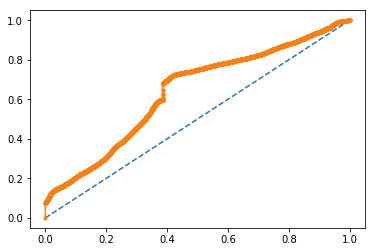

In [36]:
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

### solver: newton-cg

In [37]:
clf1 = LogisticRegression(random_state=123, solver='newton-cg').fit(X_train, y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [38]:
previsoes1 = clf.predict(X_test)

In [39]:
previsoes1

array([1, 1, 1, ..., 1, 1, 1])

In [40]:
y_prob1 = clf.predict_log_proba(X_test)

In [41]:
y_prob1

array([[-0.84297938, -0.56286693],
       [-1.42170986, -0.27615025],
       [-0.9078613 , -0.51648498],
       ...,
       [-1.48562912, -0.25664848],
       [-1.43806164, -0.27100518],
       [-1.47535948, -0.25967334]])

In [42]:
probs1 = y_prob[:, 1]

In [43]:
clf1.score(X_train, y_train)

0.6901774320957648

AUC: 0.638


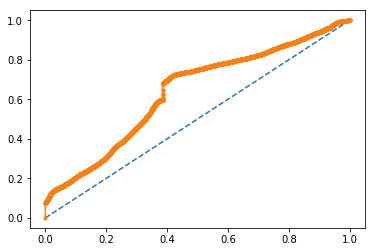

In [44]:
# calculate AUC
auc = roc_auc_score(y_test, probs1)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs1)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

### ‘saga’

In [45]:
clf2 = LogisticRegression(random_state=123, solver='newton-cg').fit(X_train, y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [46]:
previsoes2 = clf.predict(X_test)

In [47]:
previsoes2

array([1, 1, 1, ..., 1, 1, 1])

In [48]:
y_prob2 = clf.predict_log_proba(X_test)

In [49]:
y_prob2

array([[-0.84297938, -0.56286693],
       [-1.42170986, -0.27615025],
       [-0.9078613 , -0.51648498],
       ...,
       [-1.48562912, -0.25664848],
       [-1.43806164, -0.27100518],
       [-1.47535948, -0.25967334]])

In [50]:
clf2.score(X_train, y_train)

0.6901774320957648

In [53]:
prob2 = y_prob2[:, 1]

AUC: 0.638


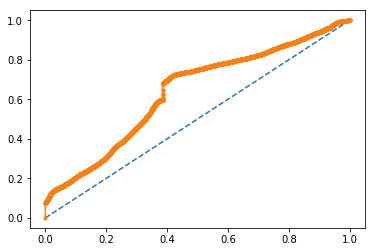

In [54]:
# calculate AUC
auc = roc_auc_score(y_test, prob2)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, prob2)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

 ## 63% chance that model will be able to distinguish between positive class and negative class.

## Features categorizadas

In [55]:
features = pd.read_csv(adress3)

In [56]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.33, random_state=123)

In [57]:
clf = LogisticRegression(fit_intercept=True, max_iter=100000)
clf.fit(X_train, y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100000, multi_class='ovr',
          n_jobs=1, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [67]:
clf = LogisticRegression(random_state=123, solver='newton-cg').fit(X_train, y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [68]:
previsoes = clf.predict(X_test)

In [69]:
previsoes

array([1, 1, 1, ..., 1, 1, 1])

In [70]:
y_prob = clf.predict_log_proba(X_test)

In [71]:
y_prob

array([[-0.90502789, -0.51840528],
       [-1.07917615, -0.4153267 ],
       [-0.79104486, -0.60398465],
       ...,
       [-1.65443438, -0.21220382],
       [-1.61371287, -0.22207766],
       [-1.66084189, -0.21069507]])

In [72]:
probs = y_prob[:, 1]

In [73]:
probs

array([-0.51840528, -0.4153267 , -0.60398465, ..., -0.21220382,
       -0.22207766, -0.21069507])

In [74]:
clf.score(X_train, y_train)

0.7045785987725588

AUC: 0.652


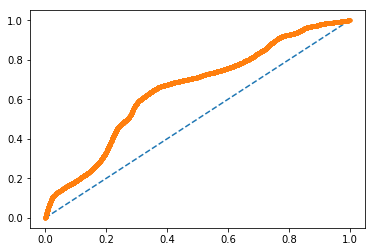

In [75]:
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

###  65% chance that model will be able to distinguish between positive class and negative class.